<a href="https://colab.research.google.com/github/Kostia2004/NumBot/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание и обучение полносвязной нейросети

In [2]:
# Загрузка библиотек и датасета
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
(x_train_0, y_train_0), (x_test_0, y_test_0) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# подготовка данных
x_train = x_train_0.reshape(60000, 784)
x_test = x_test_0.reshape(10000, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = utils.to_categorical(y_train_0, 10)
y_test = utils.to_categorical(y_test_0, 10)

In [4]:
#Создаём сеть прямого распространения
def create_model():
  model = Sequential()
  model.add(Dense(280, input_dim=784, activation="selu"))
  model.add(Dense(140, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [5]:
def testModel(iterations, epochs = 12, verb = 1):
  acc = [] 
  for i in range(iterations):
    #Создание сети
    model = create_model()
    #Обучение сети
    history = model.fit(x_train, y_train, batch_size = 64, epochs=epochs, verbose=verb, validation_data=(x_test, y_test))
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show() #отрисовка графика роста правильности
    acc.append(history.history["val_accuracy"][-1]) #Добавляем в лист точность на проверочной выборке на последней итерации
  
  #Возвращаем лист точностей и модель
  return acc, model

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3712 - accuracy: 0.8889 - val_loss: 0.1188 - val_accuracy: 0.9630
Epoch 2/12
938/938 [==============================] - 4s 4ms/step - loss: 0.1066 - accuracy: 0.9679 - val_loss: 0.1024 - val_accuracy: 0.9672
Epoch 3/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 4/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0589 - accuracy: 0.9806 - val_loss: 0.1212 - val_accuracy: 0.9642
Epoch 5/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0461 - accuracy: 0.9842 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 6/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0417 - accuracy: 0.9866 - val_loss: 0.0866 - val_accuracy: 0.9734
Epoch 7/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0833 - val_accuracy: 0.9780
Epoch 

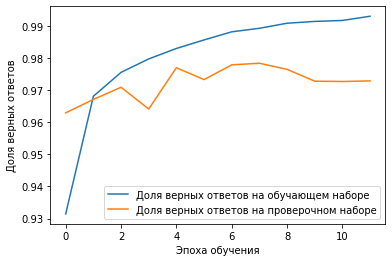

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3841 - accuracy: 0.8844 - val_loss: 0.1237 - val_accuracy: 0.9627
Epoch 2/12
938/938 [==============================] - 4s 4ms/step - loss: 0.1010 - accuracy: 0.9687 - val_loss: 0.0976 - val_accuracy: 0.9691
Epoch 3/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0691 - accuracy: 0.9781 - val_loss: 0.1004 - val_accuracy: 0.9682
Epoch 4/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0571 - accuracy: 0.9818 - val_loss: 0.0834 - val_accuracy: 0.9734
Epoch 5/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0453 - accuracy: 0.9853 - val_loss: 0.0887 - val_accuracy: 0.9727
Epoch 6/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0375 - accuracy: 0.9868 - val_loss: 0.0686 - val_accuracy: 0.9787
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0276 - accuracy: 0.9903 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 

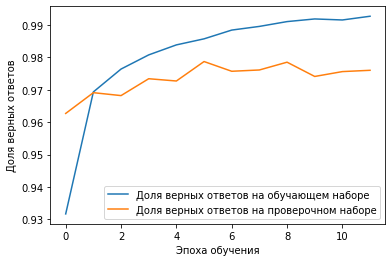

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3780 - accuracy: 0.8864 - val_loss: 0.1091 - val_accuracy: 0.9672
Epoch 2/12
938/938 [==============================] - 4s 5ms/step - loss: 0.1043 - accuracy: 0.9678 - val_loss: 0.0997 - val_accuracy: 0.9687
Epoch 3/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0723 - accuracy: 0.9769 - val_loss: 0.0936 - val_accuracy: 0.9715
Epoch 4/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.0876 - val_accuracy: 0.9728
Epoch 5/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0832 - val_accuracy: 0.9751
Epoch 6/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.0798 - val_accuracy: 0.9765
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0303 - accuracy: 0.9893 - val_loss: 0.0949 - val_accuracy: 0.9739
Epoch 

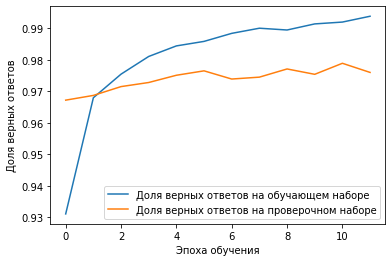

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3817 - accuracy: 0.8858 - val_loss: 0.1420 - val_accuracy: 0.9561
Epoch 2/12
938/938 [==============================] - 5s 5ms/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.1220 - val_accuracy: 0.9625
Epoch 3/12
938/938 [==============================] - 6s 6ms/step - loss: 0.0751 - accuracy: 0.9760 - val_loss: 0.0946 - val_accuracy: 0.9714
Epoch 4/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0556 - accuracy: 0.9824 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 5/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0895 - val_accuracy: 0.9746
Epoch 6/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.0942 - val_accuracy: 0.9731
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0894 - val_accuracy: 0.9754
Epoch 

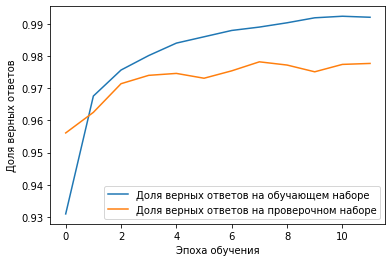

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3877 - accuracy: 0.8835 - val_loss: 0.1247 - val_accuracy: 0.9636
Epoch 2/12
938/938 [==============================] - 4s 5ms/step - loss: 0.1140 - accuracy: 0.9645 - val_loss: 0.0997 - val_accuracy: 0.9694
Epoch 3/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.1014 - val_accuracy: 0.9697
Epoch 4/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0593 - accuracy: 0.9813 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 5/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 6/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0907 - val_accuracy: 0.9719
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0353 - accuracy: 0.9881 - val_loss: 0.0981 - val_accuracy: 0.9731
Epoch 

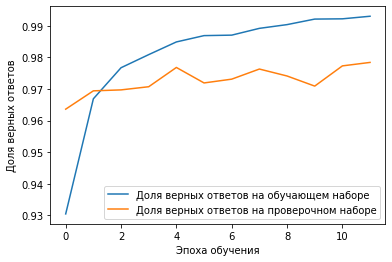

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3663 - accuracy: 0.8903 - val_loss: 0.1177 - val_accuracy: 0.9632
Epoch 2/12
938/938 [==============================] - 4s 4ms/step - loss: 0.1053 - accuracy: 0.9685 - val_loss: 0.1247 - val_accuracy: 0.9589
Epoch 3/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0758 - accuracy: 0.9759 - val_loss: 0.0884 - val_accuracy: 0.9725
Epoch 4/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.0881 - val_accuracy: 0.9710
Epoch 5/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0457 - accuracy: 0.9848 - val_loss: 0.0874 - val_accuracy: 0.9726
Epoch 6/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0416 - accuracy: 0.9861 - val_loss: 0.1067 - val_accuracy: 0.9718
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 

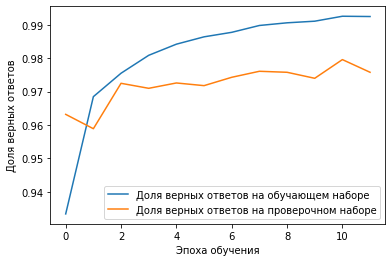

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3909 - accuracy: 0.8802 - val_loss: 0.1255 - val_accuracy: 0.9605
Epoch 2/12
938/938 [==============================] - 4s 5ms/step - loss: 0.1074 - accuracy: 0.9668 - val_loss: 0.0930 - val_accuracy: 0.9710
Epoch 3/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.0887 - val_accuracy: 0.9724
Epoch 4/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.1076 - val_accuracy: 0.9663
Epoch 5/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0887 - val_accuracy: 0.9723
Epoch 6/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 7/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0812 - val_accuracy: 0.9764
Epoch 

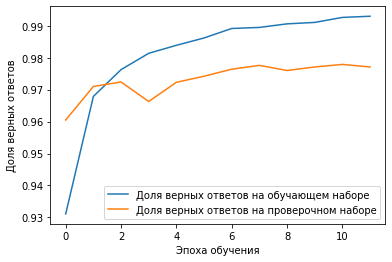

Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 0.3656 - accuracy: 0.8906 - val_loss: 0.1305 - val_accuracy: 0.9592
Epoch 2/12
938/938 [==============================] - 4s 5ms/step - loss: 0.1056 - accuracy: 0.9673 - val_loss: 0.1051 - val_accuracy: 0.9681
Epoch 3/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0770 - accuracy: 0.9750 - val_loss: 0.0837 - val_accuracy: 0.9724
Epoch 4/12
938/938 [==============================] - 4s 5ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 5/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0454 - accuracy: 0.9847 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 6/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0890 - val_accuracy: 0.9756
Epoch 7/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0312 - accuracy: 0.9890 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 

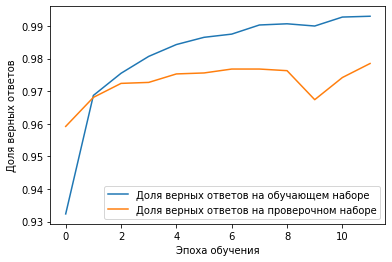

0.9766
Точность на всех запусках:  [0.973, 0.976, 0.976, 0.9777, 0.9784, 0.9758, 0.9771, 0.9785]
Среднее значение точности:  0.9766
Амплитуда разброса точности:  0.0055
Среднеквадратичное отклонение точности:  0.001681


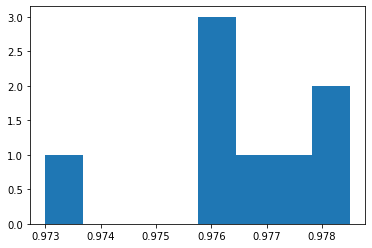

In [6]:
acc, model = testModel(8, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

In [7]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 280)               219800    
_________________________________________________________________
dense_22 (Dense)             (None, 140)               39340     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1410      
Total params: 260,550
Trainable params: 260,550
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.save('model_danse.h5')

# Создание и обучение сверточной нейросети

In [11]:
# подключение модулей
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random 
import math
import os
from google.colab import drive
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline

In [12]:
#Загрузка mnist
(x_train_0, y_train_0), (x_test_0, y_test_0) = mnist.load_data()
x_train = x_train.reshape(x_train_0.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test_0.shape[0], 28, 28, 1)
y_train = utils.to_categorical(y_train_0, 10)
y_test = utils.to_categorical(y_test_0, 10)

In [13]:
# создание и компиляция нейросети со сверточными слоями
def create_model():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(28, 28, 1)))
  model.add(Conv2D(9, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(18, (3, 3), padding='same', activation='selu'))
  model.add(MaxPooling2D(pool_size=(4, 4)))
  model.add(Conv2D(36, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(140, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [16]:
def testModel(iterations, epochs = 5, verb = 1):
  acc = [] 
  for i in range(iterations):
    #Создание сети
    model = create_model()
    #Обучение сети
    history = model.fit(x_train, y_train, batch_size = 128, epochs=epochs, validation_split=0.2, verbose=verb)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show() #отрисовка графика роста правильности
    acc.append(history.history["val_accuracy"][-1]) #Добавляем в лист точность на проверочной выборке на последней итерации
  
  #Возвращаем лист точностей и модель
  return acc, model

Epoch 1/5
375/375 [==============================] - 51s 136ms/step - loss: 0.5563 - accuracy: 0.8209 - val_loss: 0.0682 - val_accuracy: 0.9803
Epoch 2/5
375/375 [==============================] - 50s 133ms/step - loss: 0.0877 - accuracy: 0.9726 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 3/5
375/375 [==============================] - 49s 131ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0423 - val_accuracy: 0.9875
Epoch 4/5
375/375 [==============================] - 49s 132ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0345 - val_accuracy: 0.9898
Epoch 5/5
375/375 [==============================] - 49s 132ms/step - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0361 - val_accuracy: 0.9898


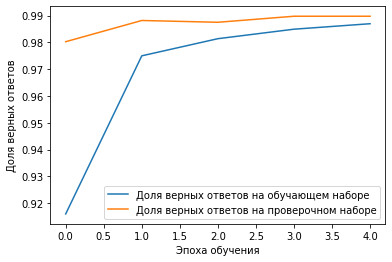

Epoch 1/5
375/375 [==============================] - 53s 141ms/step - loss: 0.5423 - accuracy: 0.8271 - val_loss: 0.0624 - val_accuracy: 0.9820
Epoch 2/5
375/375 [==============================] - 51s 137ms/step - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0455 - val_accuracy: 0.9862
Epoch 3/5
375/375 [==============================] - 51s 135ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0393 - val_accuracy: 0.9891
Epoch 4/5
375/375 [==============================] - 51s 135ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 5/5
375/375 [==============================] - 51s 135ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0351 - val_accuracy: 0.9902


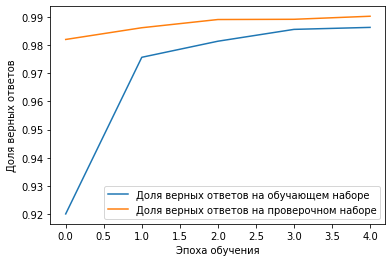

Epoch 1/5
375/375 [==============================] - 51s 134ms/step - loss: 0.6195 - accuracy: 0.7988 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 2/5
375/375 [==============================] - 50s 135ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0496 - val_accuracy: 0.9852
Epoch 3/5
375/375 [==============================] - 50s 134ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 4/5
375/375 [==============================] - 50s 134ms/step - loss: 0.0468 - accuracy: 0.9838 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 5/5
375/375 [==============================] - 50s 134ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0392 - val_accuracy: 0.9889


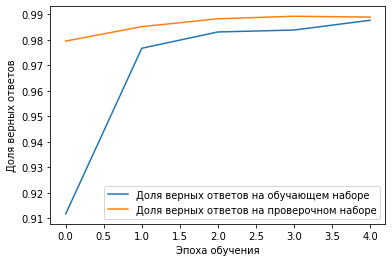

Epoch 1/5
375/375 [==============================] - 52s 137ms/step - loss: 0.5943 - accuracy: 0.8065 - val_loss: 0.0695 - val_accuracy: 0.9799
Epoch 2/5
375/375 [==============================] - 51s 135ms/step - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 3/5
375/375 [==============================] - 51s 136ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0413 - val_accuracy: 0.9881
Epoch 4/5
375/375 [==============================] - 51s 137ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 5/5
375/375 [==============================] - 51s 137ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0335 - val_accuracy: 0.9902


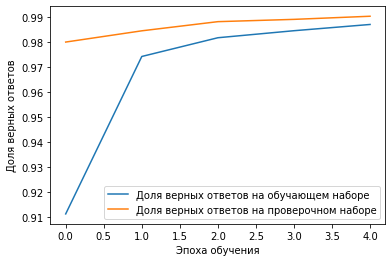

Epoch 1/5
375/375 [==============================] - 53s 139ms/step - loss: 0.5930 - accuracy: 0.8082 - val_loss: 0.0689 - val_accuracy: 0.9793
Epoch 2/5
375/375 [==============================] - 52s 138ms/step - loss: 0.0904 - accuracy: 0.9715 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 3/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0609 - accuracy: 0.9805 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 4/5
375/375 [==============================] - 52s 138ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 5/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0377 - val_accuracy: 0.9892


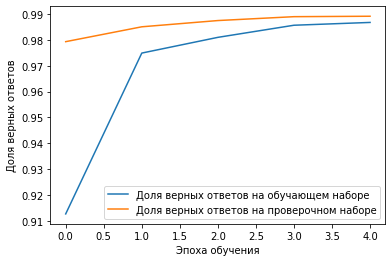

Epoch 1/5
375/375 [==============================] - 53s 140ms/step - loss: 0.5630 - accuracy: 0.8163 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 2/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0853 - accuracy: 0.9722 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 3/5
375/375 [==============================] - 52s 138ms/step - loss: 0.0622 - accuracy: 0.9795 - val_loss: 0.0389 - val_accuracy: 0.9897
Epoch 4/5
375/375 [==============================] - 52s 138ms/step - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 5/5
375/375 [==============================] - 53s 141ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0346 - val_accuracy: 0.9895


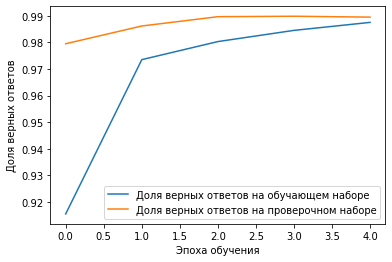

Epoch 1/5
375/375 [==============================] - 53s 141ms/step - loss: 0.5335 - accuracy: 0.8255 - val_loss: 0.0666 - val_accuracy: 0.9811
Epoch 2/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0796 - accuracy: 0.9736 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 3/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0570 - accuracy: 0.9817 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 4/5
375/375 [==============================] - 52s 140ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 5/5
375/375 [==============================] - 52s 140ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0378 - val_accuracy: 0.9895


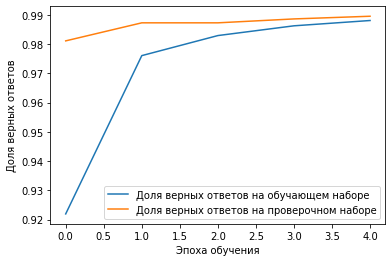

Epoch 1/5
375/375 [==============================] - 54s 141ms/step - loss: 0.5829 - accuracy: 0.8085 - val_loss: 0.0637 - val_accuracy: 0.9804
Epoch 2/5
375/375 [==============================] - 53s 141ms/step - loss: 0.0878 - accuracy: 0.9717 - val_loss: 0.0484 - val_accuracy: 0.9856
Epoch 3/5
375/375 [==============================] - 53s 141ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0405 - val_accuracy: 0.9872
Epoch 4/5
375/375 [==============================] - 52s 140ms/step - loss: 0.0483 - accuracy: 0.9840 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 5/5
375/375 [==============================] - 52s 139ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.0324 - val_accuracy: 0.9904


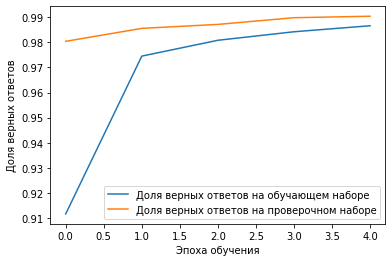

0.9897
Точность на всех запусках:  [0.9898, 0.9902, 0.9889, 0.9902, 0.9892, 0.9895, 0.9895, 0.9904]
Среднее значение точности:  0.9897
Амплитуда разброса точности:  0.0015
Среднеквадратичное отклонение точности:  0.000512


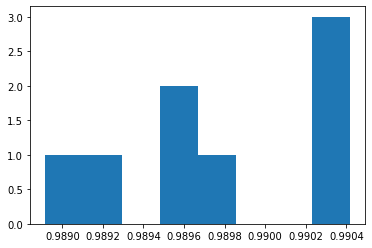

In [17]:
acc, model = testModel(8, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

In [18]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 9)         90        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 18)        1476      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 18)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 36)          5868      
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1764)            

In [ ]:
model.save('model_conv.h5')